[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/emcarthur/WeeklyPDFPlannerCreator/blob/main/flashcards/Flashcards.ipynb)

In [ ]:
# Get files in repository and change into that directory to be able to access them
!git clone https://github.com/emcarthur/WeeklyPDFPlannerCreator.git
%cd WeeklyPDFPlannerCreator/flashcards

## Code to make flashcards from a PDF 

Particularly compatible with [Anki](https://apps.ankiweb.net/) and partially inspired by: http://www.takenote.it/blog/?p=315

## To use:

* Install `flashcardtemplate.png` onto device (example Supernote, Remarkable, tablet or just a pdf editor on your computer). You can edit the `flashcardtemplate.svg` if you want the template to look different.
* Annotate it with your flashcards
* Save/export it as a pdf with your annotated flashcards
* Run it through this pipeline to cut the cards
* Import them into a flashcard software using the list of cards (front and back linked): `{OUTDIR}/{OUTFILE_PREFIX}list.txt`
  * For Anki, you will put the images into the folder `collection.media` (to find this folder based on your OS: https://docs.ankiweb.net/files.html e.g. for my Windows OS it is `C:\Users\Evonne\AppData\Roaming\Anki2\User 1\collection.media`
  * Then you will click import to load in your list of cards. Make sure to check the box to allow HTML formatting. Now your hand drawn cards are ready to use!

### Example pdf of front and back of flashcards:

<img src="https://raw.githubusercontent.com/emcarthur/WeeklyPDFPlannerCreator/main/flashcards/example_flashcards.jpg" width="250" >





In [11]:
# Config, edit this for your files!
PDF_FILE_TO_READ = 'example_flashcards.pdf'
OUTFILE_PREFIX = 'flashcards_'
OUTDIR = 'flashcard_output' # must already be created, for example !mkdir output; OUTDIR = '/content/output'

In [3]:
!pip install pdf2image
!apt-get install poppler-utils 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image
import tempfile
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (287 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


On page #1


68

68

68

68

68

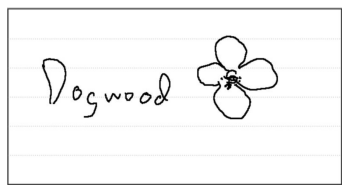

In [12]:
# Read in pdfs, save as intermediate jpg, read in as matplotlib figure

plots = {}
images = convert_from_bytes(open(PDF_FILE_TO_READ, 'rb').read())
with tempfile.TemporaryDirectory() as tmpdirname:
  for i in range(len(images)):
      fname = f'{tmpdirname}/page{i}.jpg'
      images[i].save(fname, 'JPEG')
      plots[i] = mpimg.imread(fname)

# Crop cards and export
f = open(f"{OUTDIR}/{OUTFILE_PREFIX}list.txt", "w")

coords = {'1f':(166,38),'1b':(166,827),'2f':(593,38),'2b':(593,827),'3f':(1020,38),'3b':(1020,827),'4f':(1447,38),'4b':(1447,827),'5f':(1873,38),'5b':(1873,827),}
for page in plots:
  print(f"On page #{page+1}")
  for card in range(1,6):
    for side in ['f','b']:
      v,h = coords[f'{card}{side}']
      _ = plt.imshow(plots[page][v:v+416,h:h+784])
      _ = plt.axis("off")
      _ = plt.savefig(f'{OUTDIR}/{OUTFILE_PREFIX}p{page}_c{card}{side}.png',bbox_inches='tight')
    f.write(f'<img src="{OUTFILE_PREFIX}p{page}_c{card}f.png">;<img src="{OUTFILE_PREFIX}p{page}_c{card}b.png">\n')

f.close()


In [10]:
# Behind the scenes for accessing google drive files

from google.colab import drive

ROOT = '/content/drive'
drive.mount(ROOT) # mount google drive file

PROJ = f'{ROOT}/MyDrive/Projects/WeeklyPDFPlannerCreator/flashcards'
%cd {PROJ}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Projects/WeeklyPDFPlannerCreator/flashcards
